# **Import libraries and loading dataset**

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter


import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
df=pd.read_csv("18,000_rows.csv")
df.head()

,headline,label
0,cock suck before you piss around on my work,-1
1,you are gay or antisemmitian archangel white ...,-1
2,fuck your filthy mother in the ass dry,-1
3,get fuck ed up get fuck ed up got a drink t...,-1
4,stupid peace of shit stop deleting my stuff ...,-1


# **Converting "-1" to "1"**

In [50]:
df['label'].unique()

array([-1,  0])

In [51]:
df["label"] = df["label"].replace(-1, 1)
df

,headline,label
0,cock suck before you piss around on my work,1
1,you are gay or antisemmitian archangel white ...,1
2,fuck your filthy mother in the ass dry,1
3,get fuck ed up get fuck ed up got a drink t...,1
4,stupid peace of shit stop deleting my stuff ...,1
...,...,...
15302,"No we are not, But you are a race baiting libt...",1
15303,"you wont get anyone for this challenge., after...",1
15304,"I will follow you if you are not a libtard,Mus...",1
15305,"michaelianblack Ur a child, an ostrich w/ your...",1


In [52]:
df['label'].unique()

array([1, 0])

In [53]:
df.shape[0]


15307

# **Data preprocessing**

In [54]:
unwanted_chars = ['#', '$', '%','!','@','%','^','&','*','(',')','~','`','_','-','=','+','[',']','{','}',';',':','"',',','<','>','.','/','?']
df['clean_headline'] =df['headline'].str.strip()  # Remove whitespace

for char in unwanted_chars:
  df['clean_headline'] = df['headline'].str.replace(char, " ", regex=False) #Removing unwanted characters
df['clean_headline'] = df['clean_headline'].str.lower()                     #lowercasing text

# Tokenization
tokenized_headline = df['clean_headline'].apply(lambda x: x.split())

# Lemmatization
lemmatizer = nltk.stem.WordNetLemmatizer()
tokenized_tweet = tokenized_headline.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

df = df[['clean_headline', 'label']]
df

,clean_headline,label
0,cock suck before you piss around on my work,1
1,you are gay or antisemmitian archangel white ...,1
2,fuck your filthy mother in the ass dry,1
3,get fuck ed up get fuck ed up got a drink t...,1
4,stupid peace of shit stop deleting my stuff ...,1
...,...,...
15302,"no we are not, but you are a race baiting libt...",1
15303,"you wont get anyone for this challenge., after...",1
15304,"i will follow you if you are not a libtard,mus...",1
15305,"michaelianblack ur a child, an ostrich w/ your...",1


In [55]:

df['clean_headline']=df['clean_headline'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df

<ipython-input-55-9dea71d2f8bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_headline']=df['clean_headline'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


,clean_headline,label
0,cock suck piss around work,1
1,gay antisemmitian archangel white tiger meow g...,1
2,fuck filthy mother ass dry,1
3,get fuck ed get fuck ed got drink cant put get...,1
4,stupid peace shit stop deleting stuff ass hole...,1
...,...,...
15302,"not, race baiting libtard jackwagon..",1
15303,"wont get anyone challenge., snowflake, libtard...",1
15304,"follow libtard,muslim, ate involved blm 3%er.",1
15305,"michaelianblack ur child, ostrich w/ head sand...",1


# **Exploratory Data Analysis**

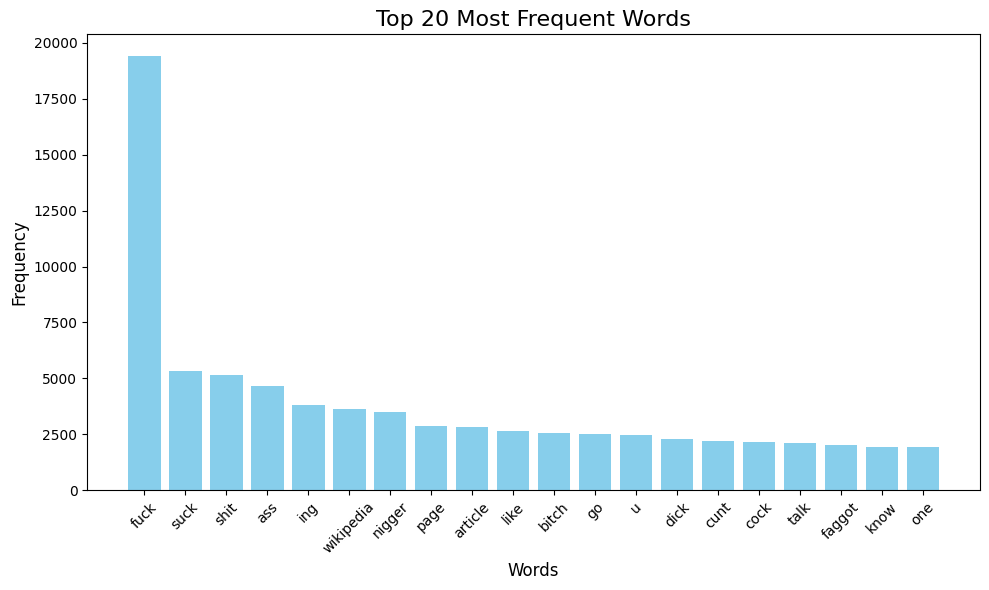

In [56]:
# Combine all headlines into a single string
all_headlines = ' '.join(df['clean_headline'])

# Split the string into words
words = all_headlines.split()

# Count word occurrences
word_counts = Counter(words)

# Get the top 10 most common words
top_n = 20
most_common_words = word_counts.most_common(top_n)

# Create a dataframe for visualization
freq_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(freq_df['Word'], freq_df['Frequency'], color='skyblue')
plt.title(f'Top {top_n} Most Frequent Words', fontsize=16)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

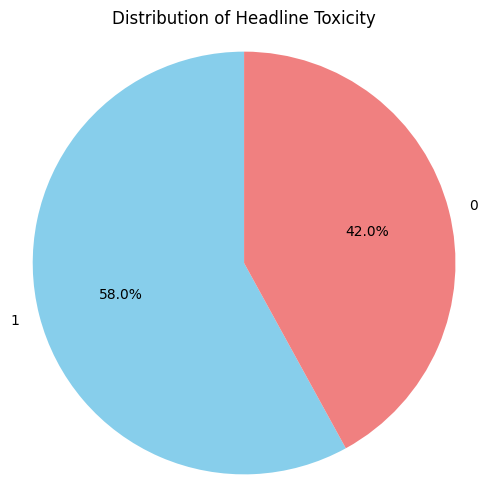

In [57]:
labels = df['label'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(labels, labels=labels.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Headline Toxicity')
_ = plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

In [58]:
df.isna().sum()

,0
clean_headline,0
label,0


# **Data splitting and model traning**

In [ ]:

vectorizer = TfidfVectorizer(token_pattern=r'\b[a-zA-Z]+\b', max_features=1000)
X = vectorizer.fit_transform(df['clean_headline'])
df['label'] = pd.Categorical(df['label'])
y = df['label'].cat.codes

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,  random_state = 42)

lr = LogisticRegression()
dt = DecisionTreeClassifier()
nb = MultinomialNB()

lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
nb.fit(X_train, y_train)

y_pred_lr_test = lr.predict(X_test)
y_pred_dt_test = dt.predict(X_test)
y_pred_nb_test = nb.predict(X_test)

# **Calculating metrices**

In [64]:
def get_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    return accuracy, f1, precision, recall

# Store results in a list of dictionaries
metrics = []
models = ['Logistic Regression', 'Decision Tree', 'Naive Bayes']
for model, y_pred_test in zip(models, [y_pred_lr_test, y_pred_dt_test, y_pred_nb_test]):
    acc_test, f1_test, precision_test, recall_test = get_metrics(y_test, y_pred_test)
    metrics.append({
        'Model': model,
        'Accuracy': acc_test,
        'F1 Score': f1_test,
        'Precision': precision_test,
        'Recall': recall_test,
    })

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

                 Model  Accuracy  F1 Score  Precision    Recall
0  Logistic Regression  0.921946  0.922217   0.923852  0.921946
1        Decision Tree  0.918027  0.918141   0.918422  0.918027
2          Naive Bayes  0.877858  0.876980   0.878549  0.877858


# **Comparing Models**

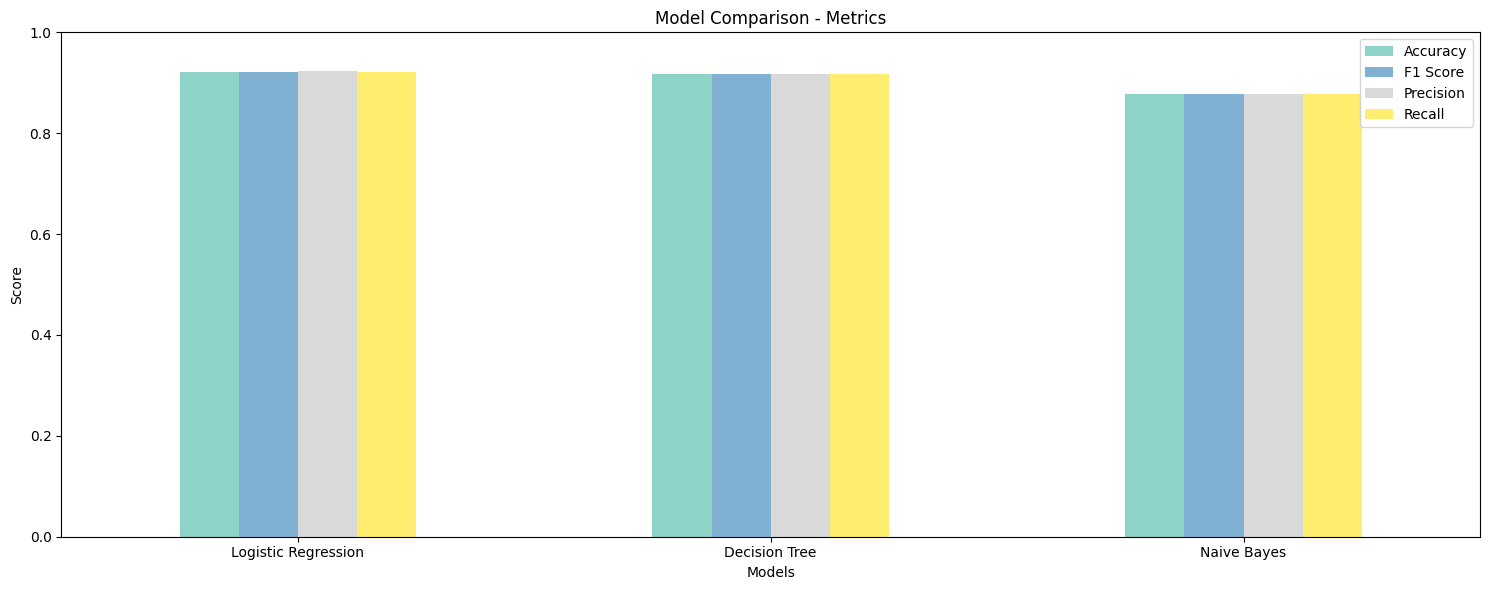

In [62]:
metrics_df.set_index('Model', inplace=True)

# Plot accuracy, precision, recall, and f1 score
fig, ax = plt.subplots(figsize=(15, 6))

metrics_df.plot(kind='bar', ax=ax, colormap='Set3')
ax.set_title('Model Comparison - Metrics')
ax.set_ylabel('Score')
ax.set_xlabel('Models')
ax.set_ylim([0, 1])
plt.xticks(rotation=0)

# Display the plot
plt.tight_layout()
plt.show()